In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DaskProfileReader import *

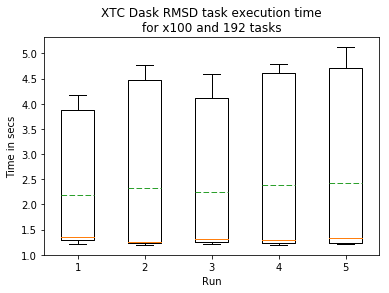

In [2]:
dataSize = [100]
coreCounts = [192]
tries = 5
fig,axes=plt.subplots(nrows=1,ncols=1,sharex=True)
i=0
for Size in dataSize:
    for coreCount in coreCounts:
        timings = np.load('XTC%d_%d_1.npz.npy'%(Size,coreCount))
        execTimes1 = timings[1,:] - timings[0,:]
        timings = np.load('XTC%d_%d_2.npz.npy'%(Size,coreCount))
        execTimes2 = timings[1,:] - timings[0,:]
        timings = np.load('XTC%d_%d_3.npz.npy'%(Size,coreCount))
        execTimes3 = timings[1,:] - timings[0,:]
        timings = np.load('XTC%d_%d_4.npz.npy'%(Size,coreCount))
        execTimes4 = timings[1,:] - timings[0,:]
        timings = np.load('XTC%d_%d_5.npz.npy'%(Size,coreCount))
        execTimes5 = timings[1,:] - timings[0,:]
        axes.boxplot([execTimes1,execTimes2,execTimes3,execTimes4,execTimes5],showfliers=True,showmeans=True,meanline=True)
        axes.set_title('XTC Dask RMSD task execution time\nfor x%d and %d tasks'%(Size,coreCount))
        axes.set_xlabel('Run')
        axes.set_ylabel('Time in secs')
        i+=1
plt.show()

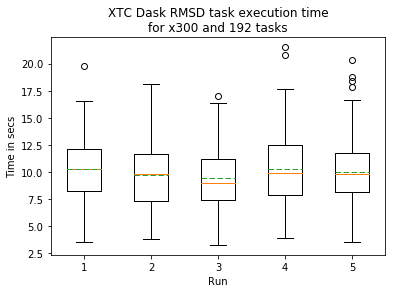

In [3]:
dataSize = [300]
coreCounts = [192]
tries = 5
fig,axes=plt.subplots(nrows=1,ncols=1,sharex=True)
i=0
for Size in dataSize:
    for coreCount in coreCounts:
        timings = np.load('XTC%d_%d_1.npz.npy'%(Size,coreCount))
        execTimes1 = timings[1,:] - timings[0,:]
        timings = np.load('XTC%d_%d_2.npz.npy'%(Size,coreCount))
        execTimes2 = timings[1,:] - timings[0,:]
        timings = np.load('XTC%d_%d_3.npz.npy'%(Size,coreCount))
        execTimes3 = timings[1,:] - timings[0,:]
        timings = np.load('XTC%d_%d_4.npz.npy'%(Size,coreCount))
        execTimes4 = timings[1,:] - timings[0,:]
        timings = np.load('XTC%d_%d_5.npz.npy'%(Size,coreCount))
        execTimes5 = timings[1,:] - timings[0,:]
        axes.boxplot([execTimes1,execTimes2,execTimes3,execTimes4,execTimes5],showfliers=True,showmeans=True,meanline=True)
        axes.set_title('XTC Dask RMSD task execution time\nfor x%d and %d tasks'%(Size,coreCount))
        axes.set_xlabel('Run')
        axes.set_ylabel('Time in secs')
        i+=1
plt.show()

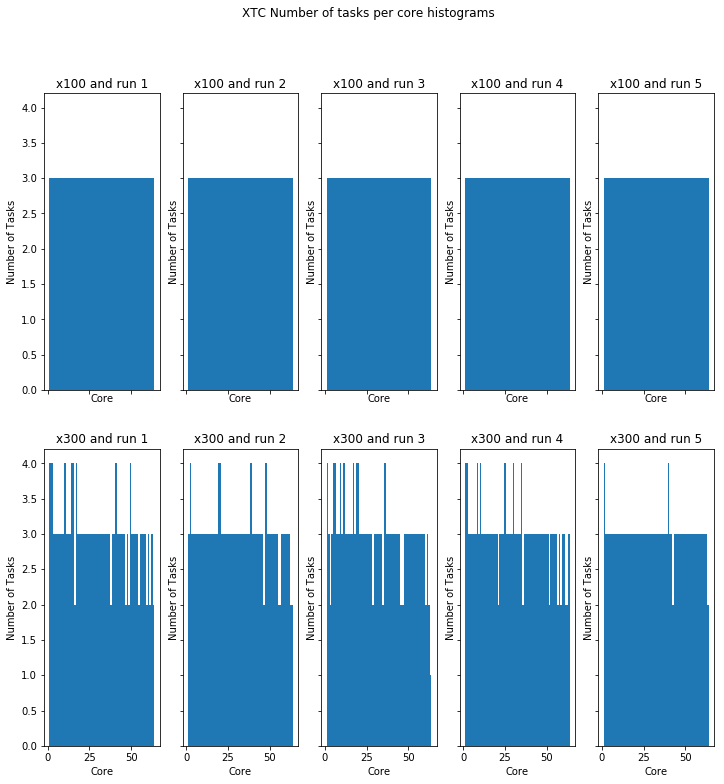

In [4]:
file_size=[100,300]
blocksize=[192]
profiles=list()
fig,axes=plt.subplots(nrows=2,ncols=5,sharex=True,sharey=True)
fig.set_size_inches(12,12)
fig.suptitle('XTC Number of tasks per core histograms')
counts = list()
i=0
for size in file_size:
    for block in blocksize:
        for run in range(1,6):
            name = 'XTC_{}_{}_{}'.format(size,block,run)
            profile = DaskProfileReader(name+'.txt')
            processes = profile[profile['name']=='block_rmsd']
            a,b,c = axes[i/5,i%5].hist(processes['y'].values,bins=64)
            counts.append(a)
            profiles.append(profile)
            axes[i/5,i%5].set_title('x%d and run %d'%(size,run))
            axes[i/5,i%5].set_xlabel('Core')
            axes[i/5,i%5].set_ylabel('Number of Tasks')
            i+=1

In [5]:
xtc300_task_counts = pd.DataFrame(columns=['Run']+['Process ID %d'%i for i in range(1,65)])
file_size=[300]
blocksize=[192]
for size in file_size:
    for block in blocksize:
        for run in range(1,6):
            name = 'XTC_{}_{}_{}'.format(size,block,run)
            profile = DaskProfileReader(name+'.txt')
            processes = profile[profile['name']=='block_rmsd']
            a = np.histogram(processes['y'].values,bins=64)
            xtc300_task_counts.loc[len(xtc300_task_counts)]=[run]+a[0].tolist()
            assigns = np.histogram(a[0],bins=3)
            text = 'Total Number of processes with '
            for count,tasks in zip(assigns[0].tolist(),assigns[1].tolist()):
                text += '%d tasks: %d, '%(np.ceil(tasks),count)
            print text
            

Total Number of processes with 2 tasks: 8, 3 tasks: 48, 4 tasks: 8, 
Total Number of processes with 2 tasks: 5, 3 tasks: 54, 4 tasks: 5, 
Total Number of processes with 1 tasks: 1, 2 tasks: 7, 3 tasks: 56, 
Total Number of processes with 2 tasks: 7, 3 tasks: 50, 4 tasks: 7, 
Total Number of processes with 2 tasks: 2, 3 tasks: 60, 4 tasks: 2, 


In [6]:
xtc300_task_counts

,Run,Process ID 1,Process ID 2,Process ID 3,Process ID 4,Process ID 5,Process ID 6,Process ID 7,Process ID 8,Process ID 9,...,Process ID 55,Process ID 56,Process ID 57,Process ID 58,Process ID 59,Process ID 60,Process ID 61,Process ID 62,Process ID 63,Process ID 64
0,1.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,2.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0
1,2.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0
2,3.0,4.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,4.0,...,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,1.0
3,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,...,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0
4,5.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0
